# Clustering — Complete Theory + Practical Notebook
**Combined notebook containing detailed answers and runnable code for every question from your assignment PDF.**

*Created for Amit Khotele.*


## Part A — Theory Questions (detailed answers)


Below are detailed answers to the theoretical questions included in your PDF.


1. **What is unsupervised learning in the context of machine learning?**

Unsupervised learning is a class of machine learning algorithms that work with **unlabeled data**. The model's objective is to discover structure in the input data — for example, groups (clusters), low-dimensional representations, or data density regions — without supervision in the form of target labels. Common tasks: clustering, dimensionality reduction, anomaly detection.

---

2. **How does K-Means clustering algorithm work?**

K-Means partitions n samples into k clusters by minimizing within-cluster sum-of-squares (inertia). Steps:
- Initialize k centroids (randomly or with K-Means++).
- Assign each point to the nearest centroid (based on Euclidean distance).
- Recompute centroids as the mean of assigned points.
- Repeat assign + update until convergence (centroids stop changing or max iterations reached).

Limitations: assumes spherical clusters, sensitive to initialization and scaling.

---

3. **Explain the concept of a dendrogram in hierarchical clustering.**

A dendrogram is a tree-like diagram showing the nested grouping produced by hierarchical clustering. The vertical axis often represents the distance or dissimilarity at which clusters merge. Cutting the dendrogram at a chosen height gives a clustering into groups.

---

4. **What is the main difference between K-Means and Hierarchical Clustering?**

K-Means is a partitioning method that requires specifying k and optimizes centroids iteratively. Hierarchical clustering builds a nested sequence of clusters (agglomerative: bottom-up merges; divisive: top-down splits) and produces a dendrogram—no need to pick k in advance.

---

5. **What are the advantages of DBSCAN over K-Means?**

- Detects clusters of arbitrary shapes.
- Explicitly identifies noise/outliers.
- Does not require number of clusters k in advance (requires eps and min_samples instead).

---

6. **When would you use Silhouette Score in clustering?**

Use Silhouette Score to evaluate clustering quality: it measures how similar a sample is to its own cluster versus other clusters. Useful for choosing k or comparing clustering algorithms — values range from -1 to +1 (higher is better).

---

7. **What are the limitations of Hierarchical Clustering?**

- Computationally expensive for large datasets (agglomerative naïve implementations are O(n^3) time, O(n^2) memory).
- Once a merge is done it cannot be undone (greedy), so early mistakes persist.
- Sensitive to noise and outliers unless robust linkage or pre-processing is used.

---

8. **Why is feature scaling important in clustering algorithms like K-Means?**

Clustering often relies on distance metrics (e.g., Euclidean). If features have different scales, features with larger ranges dominate distance computations. Scaling (standardization or min-max) ensures each feature contributes proportionally.

---

9. **How does DBSCAN identify noise points?**

DBSCAN classifies points as core, border, or noise. A point is **core** if at least *min_samples* points lie within radius *eps*. Points within *eps* of a core point but not core themselves are **border** points. Points that are neither core nor border are labeled **noise** (-1 label).

---

10. **Define inertia in the context of K-Means.**

Inertia = sum of squared distances of samples to their nearest cluster center. It measures within-cluster compactness — lower inertia is better, but it always decreases with larger k, so it can't be used alone to choose k.

---

11. **What is the elbow method in K-Means clustering?**

Plot inertia vs number of clusters k. The 'elbow' point where inertia reduction slows suggests a good trade-off between k and compactness. It's heuristic and sometimes ambiguous.

---

12. **Describe the concept of "density" in DBSCAN.**

Density = number of points in an eps-neighborhood. DBSCAN forms clusters from high-density regions where points have at least *min_samples* neighbors within distance *eps*.

---

13. **Can hierarchical clustering be used on categorical data?**

Yes — but you need a distance metric for categorical variables (e.g., Hamming distance or other domain-specific similarity). Preprocessing like one-hot encoding plus appropriate metric can work, but care is needed.

---

14. **What does a negative Silhouette Score indicate?**

A negative silhouette score suggests that samples are assigned to the wrong clusters — they are closer to another cluster than their own.

---

15. **Explain the term "linkage criteria" in hierarchical clustering.**

Linkage determines how to compute distance between clusters when merging: single (closest pair), complete (farthest pair), average (average pairwise distance), ward (minimize variance increase). Choice affects cluster shape and robustness.

---

16. **Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

K-Means assumes clusters are convex/spherical and similarly sized; it uses centroid-based assignments so it can split large clusters or merge small dense clusters incorrectly. Non-uniform density violates its assumptions.

---

17. **What are the core parameters in DBSCAN, and how do they influence clustering?**

- **eps**: radius for neighborhood — too small = many noise points; too large = clusters merge.
- **min_samples**: min points to form a core point — higher value requires denser clusters, reducing small spurious clusters.

---

18. **How does K-Means++ improve upon standard K-Means initialization?**

K-Means++ chooses initial centers probabilistically, favoring points far from existing centers. This spreads initial centroids and reduces the chance of poor local minima — usually leads to faster convergence and better results.

---

19. **What is agglomerative clustering?**

Agglomerative clustering is a bottom-up hierarchical method: each sample starts as its own cluster, then pairs of clusters are merged iteratively according to a linkage rule until one cluster remains or desired k is reached.

---

20. **What makes Silhouette Score a better metric than just inertia for model evaluation?**

Inertia measures only within-cluster compactness (cohesion). Silhouette also accounts for separation from other clusters — combining cohesion and separation gives a fuller picture of cluster quality across clusters and samples.

---


Notes:
- For many of the practical tasks below we will scale features where appropriate and visualize clusters using matplotlib.
- When using DBSCAN, always experiment with eps and min_samples to find meaningful clusters.



## Part B — Theoretical / Implementation Tasks
Below are the tasks from the PDF. Each task includes a short explanation and runnable code.

### Task B1 — Generate synthetic data with 4 centers using `make_blobs` and apply K-Means clustering. Visualize using a scatter plot
**Explanation:** Create 4 Gaussian blobs and cluster with KMeans (k=4).

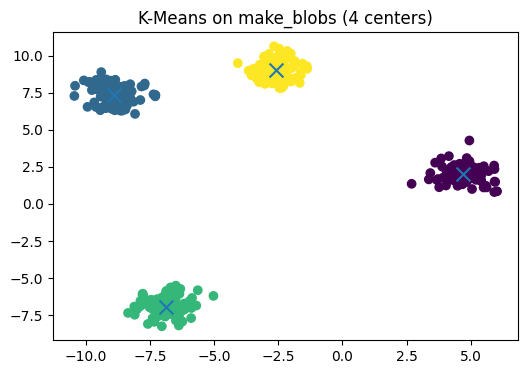

In [2]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=100)
plt.title("K-Means on make_blobs (4 centers)")
plt.show()


### Task B2 — Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

In [3]:

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
agg = AgglomerativeClustering(n_clusters=3)
iris_labels = agg.fit_predict(iris.data)
print("First 10 Agglomerative cluster labels:", iris_labels[:10])


First 10 Agglomerative cluster labels: [1 1 1 1 1 1 1 1 1 1]


### Task B3 — Generate synthetic data using `make_moons` and apply DBSCAN. Highlight outliers in the plot

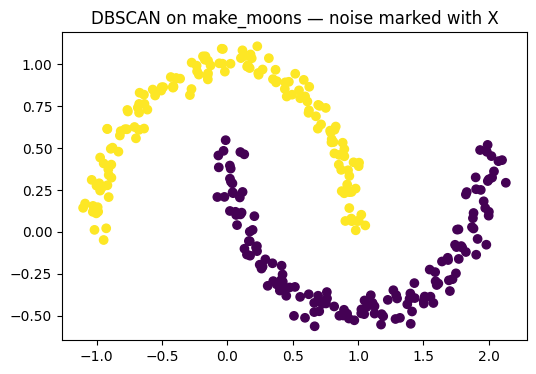

Number of noise points: 0


In [4]:

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
db = DBSCAN(eps=0.15, min_samples=5).fit(X)
labels = db.labels_
noise_mask = labels == -1

plt.figure(figsize=(6,4))
plt.scatter(X[labels!=-1,0], X[labels!=-1,1], c=labels[labels!=-1])
plt.scatter(X[noise_mask,0], X[noise_mask,1], marker='x', s=60)
plt.title("DBSCAN on make_moons — noise marked with X")
plt.show()
print('Number of noise points:', (labels==-1).sum())


### Task B4 — Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [5]:

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
Xw = wine.data
scaler = StandardScaler().fit(Xw)
Xw_s = scaler.transform(Xw)
km = KMeans(n_clusters=3, random_state=42).fit(Xw_s)
unique, counts = np.unique(km.labels_, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


### Task B5 — Use `make_circles` to generate synthetic data and cluster it using DBSCAN. Plot the result

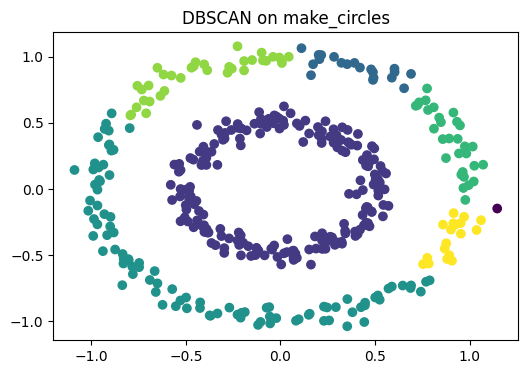

Unique labels (clusters + noise): {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}


In [6]:

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

Xc, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
db = DBSCAN(eps=0.12, min_samples=5).fit(Xc)
plt.figure(figsize=(6,4))
plt.scatter(Xc[:,0], Xc[:,1], c=db.labels_)
plt.title("DBSCAN on make_circles")
plt.show()
print("Unique labels (clusters + noise):", set(db.labels_))


### Task B6 — Load the Breast Cancer dataset, apply `MinMaxScaler`, and use K-Means with 2 clusters. Output the cluster centroids

In [7]:

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

bc = load_breast_cancer()
Xbc = bc.data
scaler = MinMaxScaler().fit(Xbc)
Xbc_s = scaler.transform(Xbc)
km2 = KMeans(n_clusters=2, random_state=42).fit(Xbc_s)
print("Centroids (scaled space):\n", km2.cluster_centers_)


Centroids (scaled space):
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


### Task B7 — Generate synthetic data using `make_blobs` with varying cluster standard deviations and cluster with DBSCAN

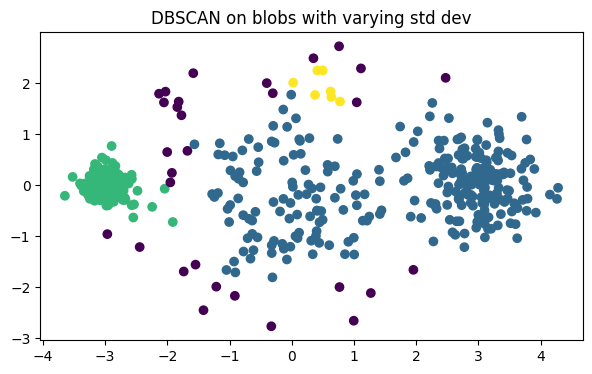

Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


In [8]:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

X_var, _ = make_blobs(n_samples=500, centers=[(-3,0),(0,0),(3,0)], cluster_std=[0.2,1.2,0.5], random_state=42)
db = DBSCAN(eps=0.5, min_samples=8).fit(X_var)
plt.figure(figsize=(7,4))
plt.scatter(X_var[:,0], X_var[:,1], c=db.labels_)
plt.title("DBSCAN on blobs with varying std dev")
plt.show()
print("Unique labels:", set(db.labels_))


### Task B8 — Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

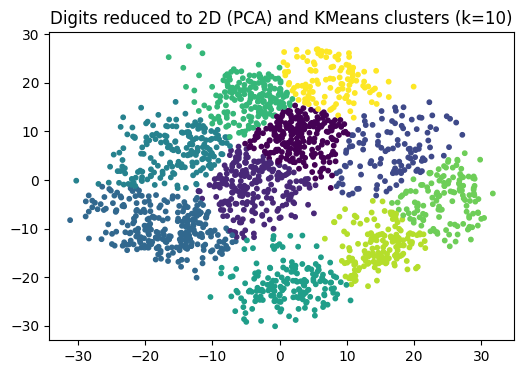

In [9]:

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
Xdig = digits.data
pca = PCA(n_components=2, random_state=42).fit_transform(Xdig)
km = KMeans(n_clusters=10, random_state=42).fit_predict(pca)
plt.figure(figsize=(6,4))
plt.scatter(pca[:,0], pca[:,1], c=km, s=10)
plt.title("Digits reduced to 2D (PCA) and KMeans clusters (k=10)")
plt.show()


### Task B9 — Create synthetic data using `make_blobs` and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

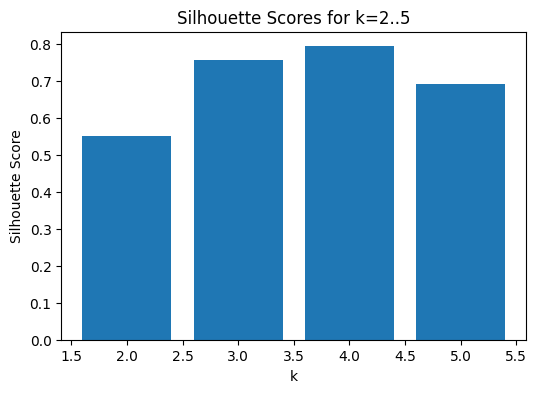

Scores: {2: 0.5505019285596375, 3: 0.7575199761758081, 4: 0.7935062634483048, 5: 0.6924539089076583}


In [10]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Xb, _ = make_blobs(n_samples=400, centers=4, random_state=42)
scores = []
ks = range(2,6)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42).fit(Xb)
    s = silhouette_score(Xb, km.labels_)
    scores.append(s)

plt.figure(figsize=(6,4))
plt.bar(list(ks), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k=2..5')
plt.show()
print('Scores:', dict(zip(ks, scores)))


### Task B10 — Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

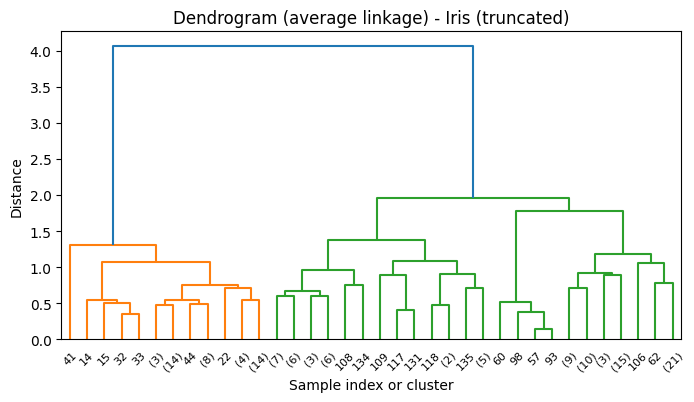

In [11]:

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

iris = load_iris()
Z = linkage(iris.data, method='average')
plt.figure(figsize=(8,4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram (average linkage) - Iris (truncated)')
plt.xlabel('Sample index or cluster')
plt.ylabel('Distance')
plt.show()


### Task B11 — Generate synthetic data with overlapping clusters using `make_blobs`, then apply K-Means and visualize with decision boundaries

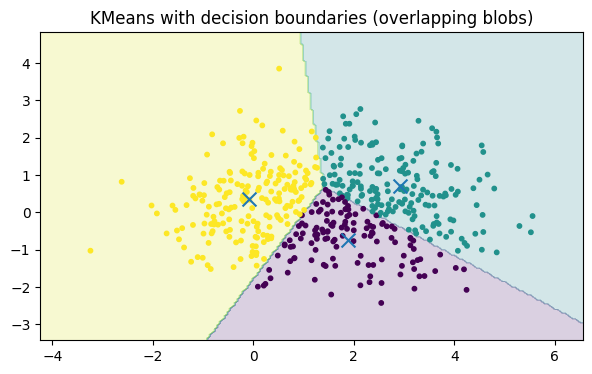

In [12]:

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_ov, _ = make_blobs(n_samples=500, centers=[[0,0],[1.5,0.5],[3,0]], cluster_std=1.0, random_state=42)
km = KMeans(n_clusters=3, random_state=42).fit(X_ov)
labels = km.labels_

# decision boundary
h = 0.05
x_min, x_max = X_ov[:,0].min()-1, X_ov[:,0].max()+1
y_min, y_max = X_ov[:,1].min()-1, X_ov[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,4))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_ov[:,0], X_ov[:,1], c=labels, s=10)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', s=100)
plt.title('KMeans with decision boundaries (overlapping blobs)')
plt.show()


### Task B12 — Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

In [13]:

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=800)
Xemb = tsne.fit_transform(X)
db = DBSCAN(eps=3.0, min_samples=5).fit(Xemb)
plt.figure(figsize=(6,4))
plt.scatter(Xemb[:,0], Xemb[:,1], c=db.labels_, s=6)
plt.title('DBSCAN on Digits after t-SNE')
plt.show()
print('Unique labels:', set(db.labels_))


TypeError: TSNE.__init__() got an unexpected keyword argument 'n_iter'

### Task B13 — Generate synthetic data using `make_blobs` and apply Agglomerative Clustering with complete linkage. Plot the result

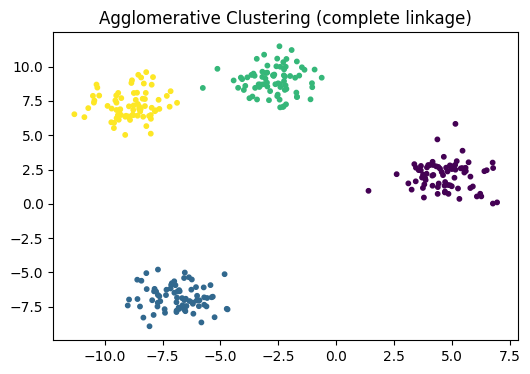

In [14]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Xc2, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete').fit_predict(Xc2)
plt.figure(figsize=(6,4))
plt.scatter(Xc2[:,0], Xc2[:,1], c=agg, s=10)
plt.title('Agglomerative Clustering (complete linkage)')
plt.show()


### Task B14 — Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

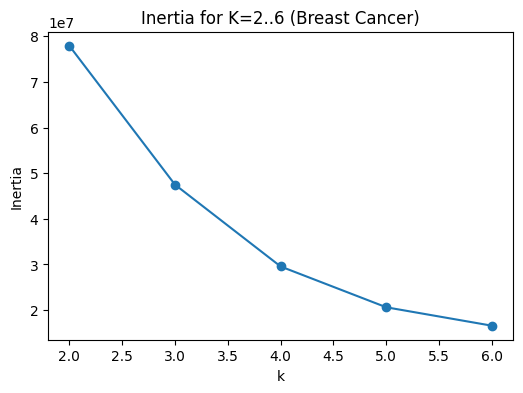

In [15]:

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X = bc.data
inertias = []
ks = range(2,7)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Inertia for K=2..6 (Breast Cancer)')
plt.show()


### Task B15 — Generate synthetic concentric circles using `make_circles` and cluster using Agglomerative Clustering with single linkage

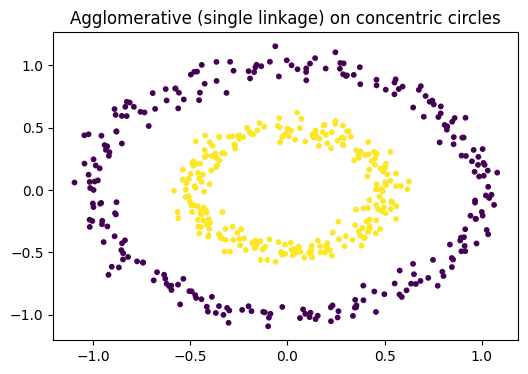

In [16]:

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

Xcir, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(Xcir)
plt.figure(figsize=(6,4))
plt.scatter(Xcir[:,0], Xcir[:,1], c=agg_single, s=10)
plt.title('Agglomerative (single linkage) on concentric circles')
plt.show()


### Task B16 — Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [17]:

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
db = DBSCAN(eps=1.2, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len([lab for lab in set(labels) if lab != -1])
print('Number of clusters (excluding noise):', n_clusters)
print('Labels set:', set(labels))


Number of clusters (excluding noise): 0
Labels set: {np.int64(-1)}


### Task B17 — Generate synthetic data with `make_blobs` and apply KMeans. Then plot the cluster centers on top of the data points

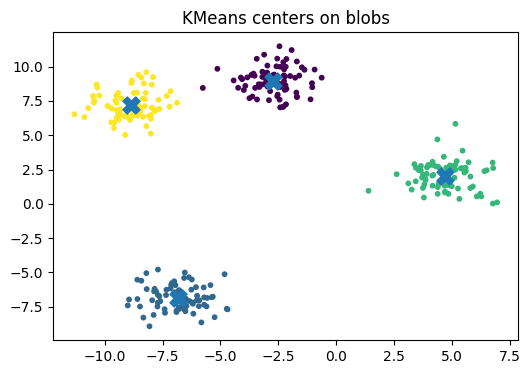

In [18]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Xmb, _ = make_blobs(n_samples=300, centers=4, random_state=42)
km = KMeans(n_clusters=4, random_state=42).fit(Xmb)
plt.figure(figsize=(6,4))
plt.scatter(Xmb[:,0], Xmb[:,1], c=km.labels_, s=10)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='X', s=150)
plt.title('KMeans centers on blobs')
plt.show()


### Task B18 — Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [19]:

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
db = DBSCAN(eps=0.7, min_samples=5).fit(iris.data)
n_noise = (db.labels_ == -1).sum()
print('Number of noise samples in Iris (eps=0.7):', n_noise)
print('Unique labels:', set(db.labels_))


Number of noise samples in Iris (eps=0.7): 3
Unique labels: {np.int64(0), np.int64(1), np.int64(-1)}


### Task B19 — Generate synthetic non-linearly separable data using `make_moons`, apply K-Means, and visualize the clustering result

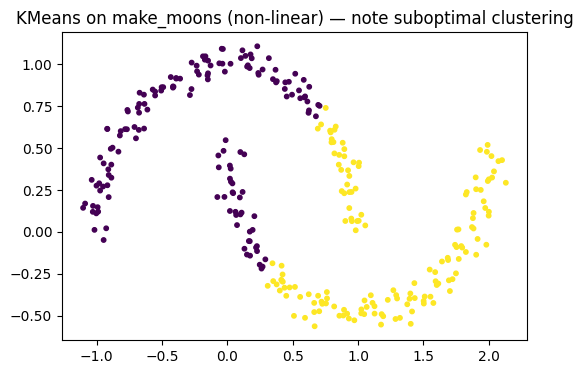

In [20]:

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Xm, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
km = KMeans(n_clusters=2, random_state=42).fit_predict(Xm)
plt.figure(figsize=(6,4))
plt.scatter(Xm[:,0], Xm[:,1], c=km, s=10)
plt.title('KMeans on make_moons (non-linear) — note suboptimal clustering')
plt.show()


### Task B20 — Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

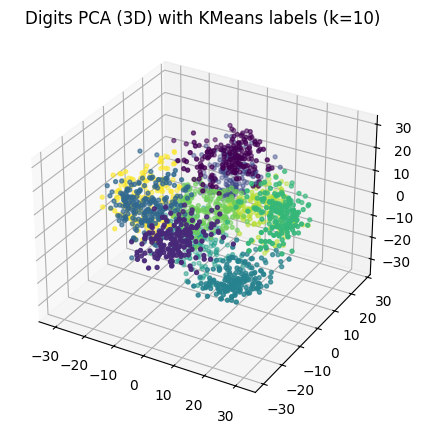

In [21]:

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
pca3 = PCA(n_components=3, random_state=42).fit_transform(X)
km = KMeans(n_clusters=10, random_state=42).fit_predict(pca3)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca3[:,0], pca3[:,1], pca3[:,2], c=km, s=8)
ax.set_title('Digits PCA (3D) with KMeans labels (k=10)')
plt.show()


## Part C — Practical Questions



### Practical 1 — Generate synthetic blobs with 5 centers and apply KMeans. Then use `silhouette_score` to evaluate the clustering

Silhouette Score (k=5): 0.7656943258903016


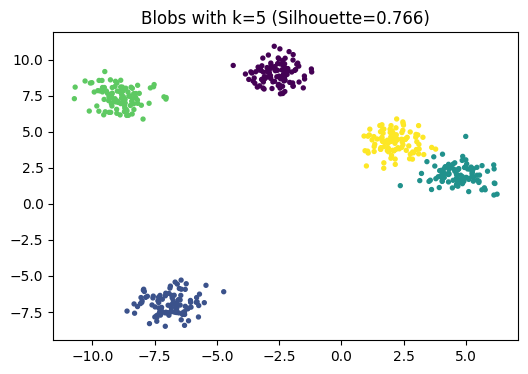

In [22]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X5, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)
km5 = KMeans(n_clusters=5, random_state=42).fit_predict(X5)
s = silhouette_score(X5, km5)
print('Silhouette Score (k=5):', s)

plt.figure(figsize=(6,4))
plt.scatter(X5[:,0], X5[:,1], c=km5, s=8)
plt.title(f'Blobs with k=5 (Silhouette={s:.3f})')
plt.show()


### Practical 2 — Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

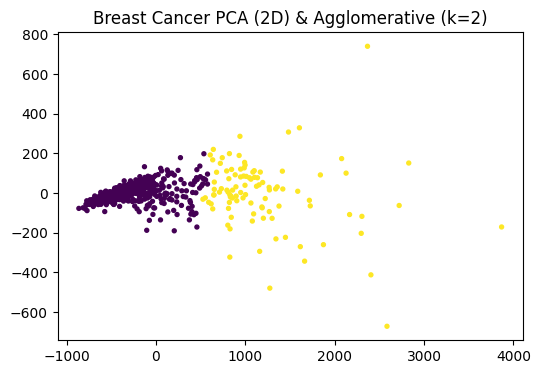

In [23]:

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X = bc.data
pca = PCA(n_components=2, random_state=42).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=2).fit_predict(pca)
plt.figure(figsize=(6,4))
plt.scatter(pca[:,0], pca[:,1], c=agg, s=8)
plt.title('Breast Cancer PCA (2D) & Agglomerative (k=2)')
plt.show()


### Practical 3 — Generate noisy circular data using `make_circles` and visualize clustering results from KMeans and DBSCAN side-by-side

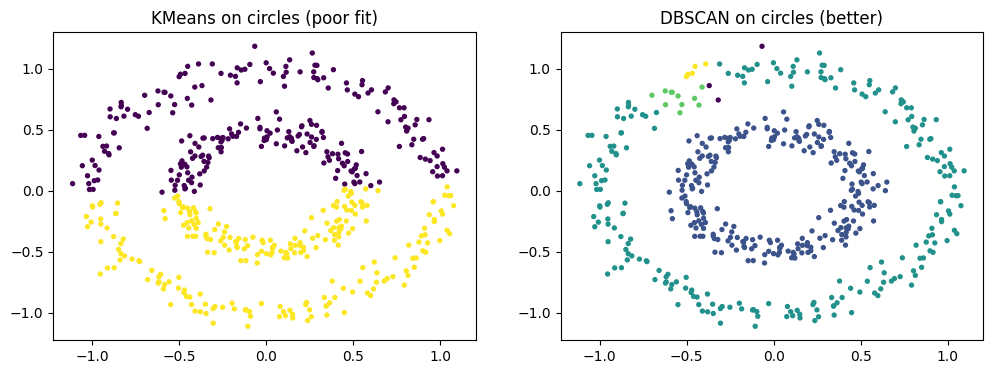

In [24]:

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

Xc, _ = make_circles(n_samples=500, factor=0.5, noise=0.06, random_state=42)
km = KMeans(n_clusters=2, random_state=42).fit_predict(Xc)
db = DBSCAN(eps=0.12, min_samples=5).fit_predict(Xc)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(Xc[:,0], Xc[:,1], c=km, s=8)
plt.title('KMeans on circles (poor fit)')
plt.subplot(1,2,2)
plt.scatter(Xc[:,0], Xc[:,1], c=db, s=8)
plt.title('DBSCAN on circles (better)')
plt.show()


### Practical 4 — Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

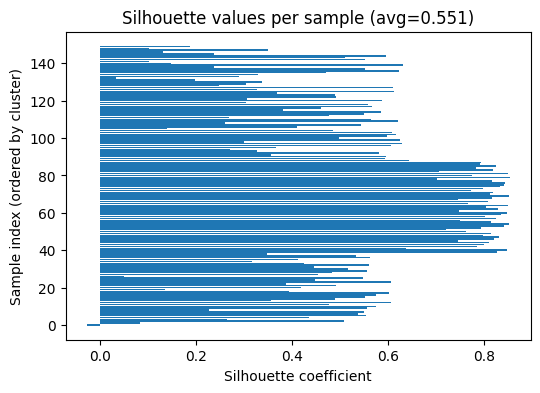

In [25]:

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
km = KMeans(n_clusters=3, random_state=42).fit_predict(X)
s_avg = silhouette_score(X, km)
samp = silhouette_samples(X, km)

# plot silhouette per sample (ordered by label)
order = np.argsort(km)
plt.figure(figsize=(6,4))
plt.barh(range(len(samp)), samp[order])
plt.title(f'Silhouette values per sample (avg={s_avg:.3f})')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Sample index (ordered by cluster)')
plt.show()


### Practical 5 — Generate synthetic data using `make_blobs` and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

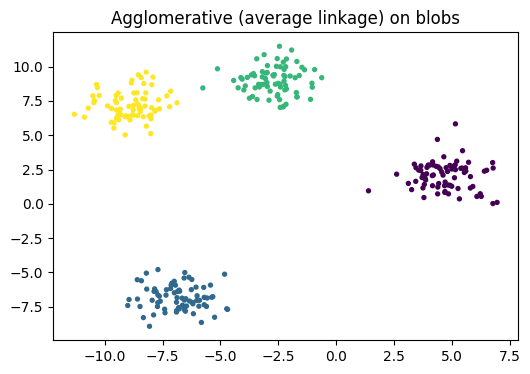

In [26]:

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

Xab, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg_avg = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(Xab)
plt.figure(figsize=(6,4))
plt.scatter(Xab[:,0], Xab[:,1], c=agg_avg, s=8)
plt.title('Agglomerative (average linkage) on blobs')
plt.show()


### Practical 6 — Use the Wine dataset, apply KMeans, and visualize the cluster assignments using a scatter matrix for the first 4 features

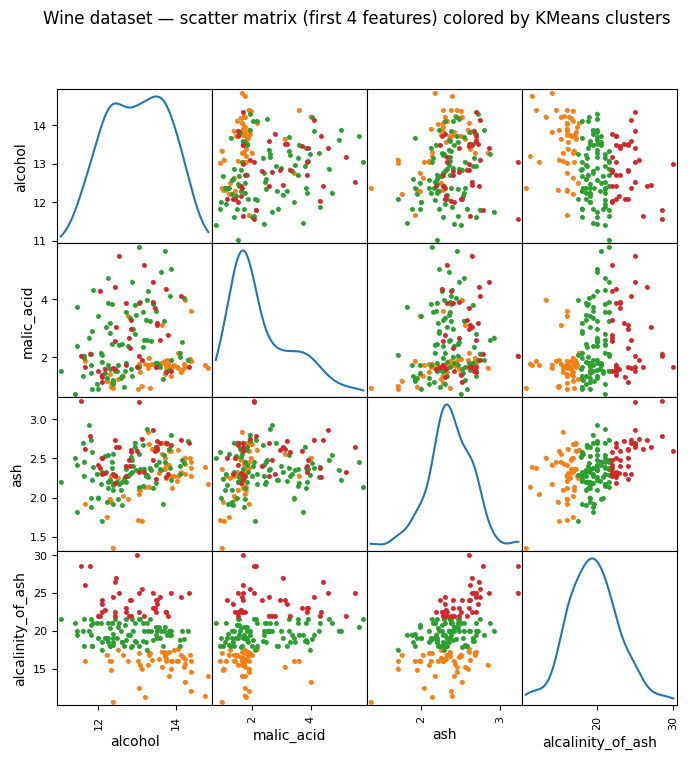

In [27]:

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()
dfw = pd.DataFrame(wine.data, columns=wine.feature_names)
kmw = KMeans(n_clusters=3, random_state=42).fit_predict(dfw.iloc[:,:4])
dfw_plot = dfw.iloc[:,:4].copy()
dfw_plot['cluster'] = kmw
# scatter matrix colored by cluster using matplotlib (loop to plot)
axes = scatter_matrix(dfw_plot.iloc[:,:4], figsize=(8,8), diagonal='kde')
# Overplot colored points for clusters
for i, col in enumerate(dfw_plot.columns[:4]):
    for j, col2 in enumerate(dfw_plot.columns[:4]):
        ax = axes[j,i]
        if j!=i:
            for lab in dfw_plot['cluster'].unique():
                mask = dfw_plot['cluster']==lab
                ax.scatter(dfw_plot.loc[mask, col], dfw_plot.loc[mask, col2], s=6)
plt.suptitle('Wine dataset — scatter matrix (first 4 features) colored by KMeans clusters')
plt.show()


### Practical 7 — Generate noisy blobs using `make_blobs` and use DBSCAN to identify both clusters and noise points. Print the count

In [28]:

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

Xn, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5, random_state=42)
dbn = DBSCAN(eps=0.9, min_samples=8).fit(Xn)
labels = dbn.labels_
n_noise = (labels==-1).sum()
n_clusters = len([lab for lab in set(labels) if lab!=-1])
print('Clusters found (excluding noise):', n_clusters)
print('Noise points:', n_noise)


Clusters found (excluding noise): 5
Noise points: 66


### Practical 8 — Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

In [29]:

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=800)
X2 = tsne.fit_transform(X)
agg = AgglomerativeClustering(n_clusters=10).fit_predict(X2)
plt.figure(figsize=(6,4))
plt.scatter(X2[:,0], X2[:,1], c=agg, s=6)
plt.title('Digits t-SNE + Agglomerative (k=10)')
plt.show()


TypeError: TSNE.__init__() got an unexpected keyword argument 'n_iter'